# Convolutional Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
from pathlib import Path

In [ ]:
model.save("model.keras")

In [2]:
model = keras.models.load_model("model.keras")

In [ ]:
import os

file_size = os.path.getsize("model.keras") / 1024  # en KB
print(f"Archivo guardado con éxito. Tamaño: {file_size:.2f} KB")

In [ ]:
import json

# Guardar el historial en formato JSON
with open("historial_entrenamiento.json", "w") as f:
    json.dump(history.history, f)

print("Historial guardado correctamente.")

In [ ]:
hist_path = os.path.join(os.getcwd(), "historial_entrenamiento.json")
print(f"Historial guardado en:\n{hist_path}")

In [3]:
import json

# Cargar el historial
with open("historial_entrenamiento.json", "r") as f:
    history = json.load(f)

In [3]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 64
DATA_DIR = Path.home() / "Downloads" / "dataset" # estructura: dataset/train/dog, dataset/train/cat, etc.

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    DATA_DIR / "training_set",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",           # para binario
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    DATA_DIR / "test_set",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

class_names = train_ds.class_names  # p.ej. ['cat', 'dog'] (orden alfabético)
print("Clases inferidas:", train_ds.class_names)


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Clases inferidas: ['cats', 'dogs']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

data_aug = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomBrightness(0.2),
    keras.layers.RandomContrast(0.2)
])

model = keras.Sequential([
    keras.layers.Input(shape=(*IMG_SIZE, 3)),
    data_aug,
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=50)

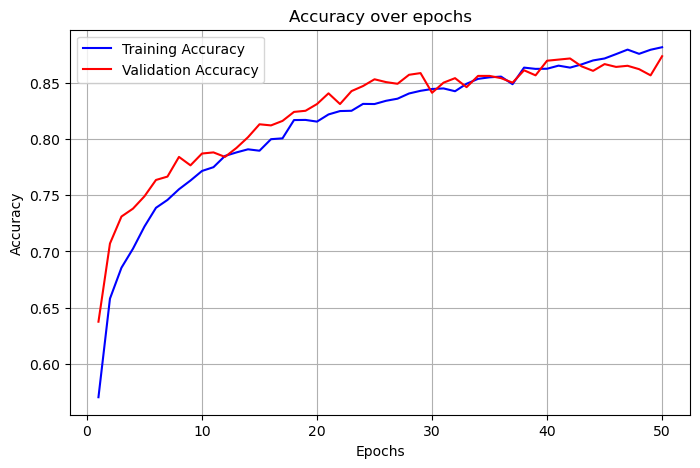

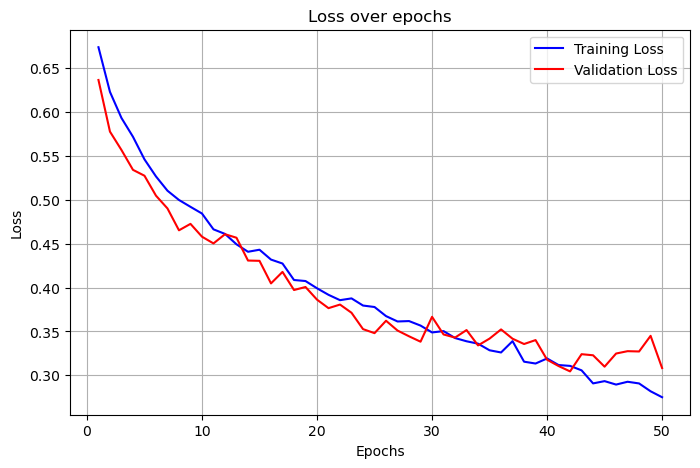

In [4]:
import matplotlib.pyplot as plt

# Extraemos métricas
acc     = history['accuracy'] # si quiero volver a entrenar el modelo, tengo que poner history.history
val_acc = history['val_accuracy']
loss    = history['loss']
val_loss= history['val_loss']

epochs = range(1, len(acc) + 1)

# --- Accuracy ---
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Loss ---
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np

img_path = Path.home() / "Downloads" / "gatosperros" / "gato7.jpg"  # ajusta ruta
img = keras.utils.load_img(img_path, target_size=IMG_SIZE)
x = keras.utils.img_to_array(img)[None, ...]  # shape (1,64,64,3)
prob = model.predict(x)[0][0]                 # 0..1
pred_idx = int(prob >= 0.5)
label = class_names[pred_idx]  # o train_ds.class_names[pred_idx]
print(f"Prob(dog)={prob:.3f}  -> {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Prob(dog)=0.043  -> cats
